In [ ]:
# Invoices: https://drive.google.com/file/d/1_JUP1EYc4r1jgNpeLh7mMQxsKOsT-pcs/view?usp=drive_link

# Customers: https://drive.google.com/file/d/1n6ePaU-cPfzhBKnSeGeynAxR9IYmCS0w/view?usp=drive_link

In [5]:
#use pandas to read data

import pandas as pd

dfi = pd.read_csv('fct_invoice.csv')
dfc = pd.read_json('dim_customer.json')

print(dfi)
print(dfc)

      invoice_no  customer_id         category  quantity    price  \
0        I138884          229         Clothing         5  1500.40   
1        I317333         3433            Shoes         3  1800.51   
2        I127801          644         Clothing         1   300.08   
3        I173702         4900            Shoes         5  3000.85   
4        I337046         1089            Books         4    60.60   
...          ...          ...              ...       ...      ...   
99452    I219422         2344         Souvenir         5    58.65   
99453    I325143          172  Food & Beverage         2    10.46   
99454    I824010          425  Food & Beverage         2    10.46   
99455    I702964          577       Technology         4  4200.00   
99456    I232867           30         Souvenir         3    35.19   

      payment_method invoice_date     shopping_mall  
0        Credit Card     5/8/2022            Kanyon  
1         Debit Card   12/12/2021    Forum Istanbul  
2        

In [114]:
#EASY

# 1. How many unique customers are in the dataset?
# 2. What are the different categories of products available? How many unique categories are there?
# 3. Which payment method is the most popular? How many times was it used?

In [115]:
#NUMBER 1
#Get data from customer

#list of people:
list = dfc['first_name'].unique()

count = 0
for i in list:
    count += 1

count

597

In [112]:
#NUMBER 2
#Get data from invoice

#Different Categories
different = dfi['category'].unique()
d_list = []
count = 0

for i in different:
    d_list.append(i)
    count += 1

print('Different Categories: ')
print(d_list)
print("")

#Unique Categories
print('Nunber of Unique Categories: ')
print(count)

Different Categories: 
['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage', 'Toys', 'Technology', 'Souvenir']

Nunber of Unique Categories: 
8


In [113]:
#NUMBER 3
#Get data from invoice

pay_list = dfi['payment_method']
pay = dfi['payment_method'].max()
count = 0

for i in pay_list:
    if i == pay:
        count += 1

print("Most Popular Payment Method: ")
print(pay)
print('')
print("Times Used: ")
print(count)
    

Most Popular Payment Method: 
Debit Card

Times Used: 
20079


In [ ]:
# MEDIUM

# 1. What are the three most popular categories, by total sales?
# 2. What are the total sales attributed to customers over the age of 45?
# 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

In [111]:
#NUMBER 1
#Get data from invoice
new_c = dfi.groupby('category')['price'].sum()
top3 = new_c.nlargest(3)

top3

category
Clothing      31075684.64
Shoes         18135336.89
Technology    15772050.00
Name: price, dtype: float64

In [120]:
#NUMBER 2
#Get data from customer first
#Get data from invoice second

#filter the age
age = dfc[dfc['age'] >45]

#get id
age_id = age['id']

#get customer id and total sales per id
sales = dfi.groupby('customer_id')['price'].sum()

#checks on sales index if the ids align with the age_id
sales_45 = sales.loc[sales.index.isin(age_id)]

#not sure sir if you want the list of total sales of the id respectively or an overall
#if the question asks for an overall, the code -- sales_45.sum() -- should work :)

print("Total sales attributed to customers over the age of 45:")
print(sales_45)
print("")
print(f"Total overall sales: PHP {sales_45.sum()}")

Total sales attributed to customers over the age of 45:
customer_id
0        83077.88
2        66280.71
3        47771.23
6        67412.39
10       64592.99
           ...   
8888       300.08
8889       107.52
9150       162.64
9344      1200.34
10350       81.32
Name: price, Length: 1655, dtype: float64

Total overall sales: PHP 22370553.27


In [18]:
#NUMBER 3
#reset imports and variables

from matplotlib import pyplot as plt
import pandas as pd

dfi = pd.read_csv('fct_invoice.csv')
dfc = pd.read_json('dim_customer.json')

#sort dfi based on invoice date
#https://saturncloud.io/blog/how-to-sort-a-pandas-dataframe-by-date/

#still a str, and must turn to chronological order
dfi['invoice_date'] = pd.to_datetime(dfi['invoice_date'], dayfirst=True)
sort_dfi = dfi.sort_values(by = 'invoice_date')

#organize qty and sales based on date
date_qty = sort_dfi.groupby('invoice_date')['quantity'].sum()
date_price = sort_dfi.groupby('invoice_date')['price'].sum()

#sort by month and chronological yearly
monthly_qty = date_qty.resample('ME').sum()
monthly_price = date_price.resample('ME').sum()

print(monthly_qty)
print("")
print(monthly_price)
print("")

invoice_date
2021-01-31    11483
2021-02-28    10179
2021-03-31    11383
2021-04-30    11270
2021-05-31    11620
2021-06-30    11352
2021-07-31    11986
2021-08-31    11205
2021-09-30    10901
2021-10-31    11711
2021-11-30    11355
2021-12-31    11651
2022-01-31    11619
2022-02-28    10248
2022-03-31    11949
2022-04-30    11288
2022-05-31    11597
2022-06-30    11322
2022-07-31    11713
2022-08-31    11716
2022-09-30    11197
2022-10-31    11766
2022-11-30    11231
2022-12-31    11501
2023-01-31    11661
2023-02-28    10916
2023-03-31     2892
Freq: ME, Name: quantity, dtype: int64

invoice_date
2021-01-31    2656422.78
2021-02-28    2358636.34
2021-03-31    2618434.14
2021-04-30    2558825.62
2021-05-31    2662369.93
2021-06-30    2547239.73
2021-07-31    2802468.58
2021-08-31    2632303.32
2021-09-30    2530305.88
2021-10-31    2782418.40
2021-11-30    2547152.35
2021-12-31    2619727.56
2022-01-31    2656149.96
2022-02-28    2318201.08
2022-03-31    2705190.76
2022-04-30    25436

Text(0, 0.5, 'Quantity')

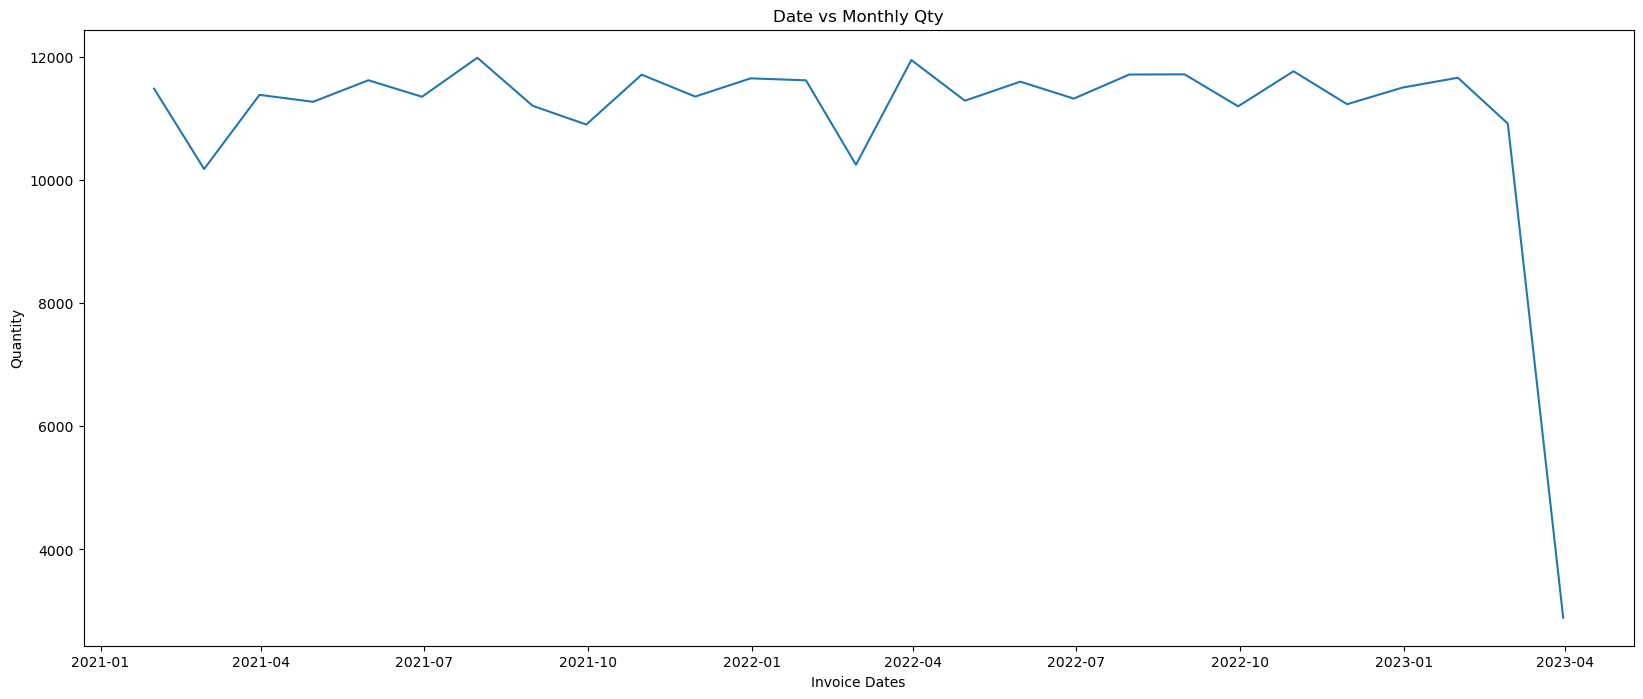

In [26]:
#Plot 1 (Date vs Monthly Qty)

plt.figure(figsize=(20,8))

plt.plot(monthly_qty.index, monthly_qty.values)
plt.title('Date vs Monthly Qty')
plt.xlabel('Invoice Dates')
plt.ylabel('Quantity')


Text(0, 0.5, 'Sales')

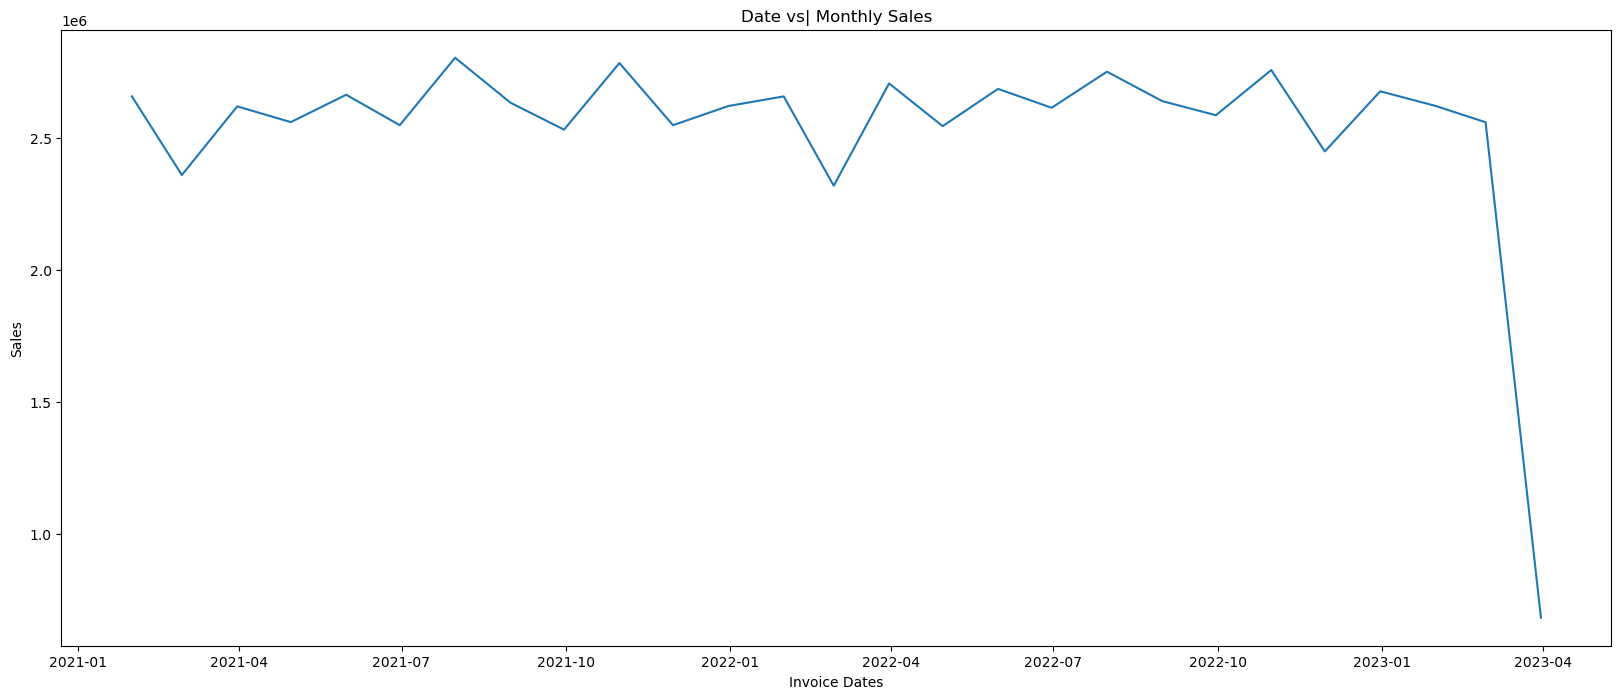

In [31]:
#Plot 2 (Date vs Monthly Sales)

plt.figure(figsize=(20,8))

plt.plot(monthly_price.index, monthly_price.values)
plt.title('Date vs| Monthly Sales')
plt.xlabel('Invoice Dates')
plt.ylabel('Sales')

In [33]:
#CONCLUSION
#Based on the graph, it can be seen that there has been a consistent drop in sales every February-March. 
#Meanwhile, there is a consistent rise during the month of July-September and November-December.

In [34]:
# Hard 
# 1. Create a pivot table showing the breakdown of sales across these dimensions, 
# in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [45]:
#Merge/combine the datasets to perform pivot

merge_ci = pd.merge(
    dfi,
    dfc,
    how = 'left', 
    left_on = 'customer_id',
    right_on = 'id'
)

#remove redundancy
merge_ci = merge_ci.drop(columns = ['id'])

#create age range
new_range = []

for i in range(10, 90, 10):
    x = str(i)+"-"+str(i+9)
    new_range.append(x)

#add new age range to data
merge_ci['age_range'] = pd.cut(
    merge_ci['age'],
    bins = range(10,100,10),
    right = False,
    labels = new_range
)

pivot_sales = merge_ci.pivot_table(
    values = 'price',
    index = 'category',
    columns = 'age_range',
    aggfunc = 'sum',
    fill_value = 0,
    observed = False
)

pivot_sales

age_range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,3469.35,21619.05,22997.70,23361.30,20664.60,21513.00,15437.85,7575.00
Clothing,518238.16,2818351.36,3074919.76,3066817.60,2803647.44,2910776.00,2117064.40,1228827.60
Cosmetics,29681.80,165079.60,198054.86,181343.60,160932.28,176627.04,114132.62,71236.32
Food & Beverage,3645.31,20428.38,23744.20,24460.71,19999.52,22190.89,14968.26,8561.51
Shoes,274277.69,1630061.72,1912141.62,1889335.16,1591650.84,1618058.32,1210542.89,708200.60
Souvenir,3296.13,15295.92,17548.08,17759.22,15084.78,15331.11,10592.19,6545.34
Technology,287700.00,1426950.00,1669500.00,1630650.00,1220100.00,1529850.00,977550.00,548100.00
Toys,17203.20,102466.56,115297.28,106910.72,94115.84,100244.48,74475.52,43043.84
